In [1458]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [1459]:
dictionary = pd.read_excel('H:\Downloads\Great learning\Project Machine Learning\Election_Data.xlsx',index_col=0)
dictionary

""
**Data Dictionary**
NaN
1. vote: Party choice: Conservative or Labour
NaN
2. age: in years
NaN
"3. economic.cond.national: Assessment of current national economic conditions, 1 to 5."
NaN
"4. economic.cond.household: Assessment of current household economic conditions, 1 to 5."
NaN


In [1460]:
# Reading the dataset
election = pd.read_excel('H:\Downloads\Great learning\Project Machine Learning\Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes',index_col=0)

In [1461]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [1462]:
election.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [1463]:
election.tail(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1516,Conservative,82,2,2,2,1,11,2,female
1517,Labour,30,3,4,4,2,4,2,male
1518,Labour,76,4,3,2,2,11,2,male
1519,Labour,50,3,4,4,2,5,2,male
1520,Conservative,35,3,4,4,2,8,2,male
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [1464]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [1465]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1466]:
election.skew()

C:\Users\balar\AppData\Local\Temp\ipykernel_9492\489060228.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  election.skew()


age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [1467]:
#null values and data types are already checked in 1.1

In [1468]:
election.shape

(1525, 9)

In [1469]:
dups = election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [1470]:
dups = election[election.duplicated()]
dups.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [1471]:
election.drop_duplicates(inplace=True)

In [1472]:
election.duplicated().sum()

0

In [1473]:
election.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [1474]:
for column in election.columns:
    if election[column].dtype == 'int64':
        print(column.upper(),': ',election[column].nunique())
        print(election[column].value_counts().sort_values())
        print('\n')

AGE :  70
91     1
93     1
90     1
92     2
87     3
      ..
46    37
47    38
35    38
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64




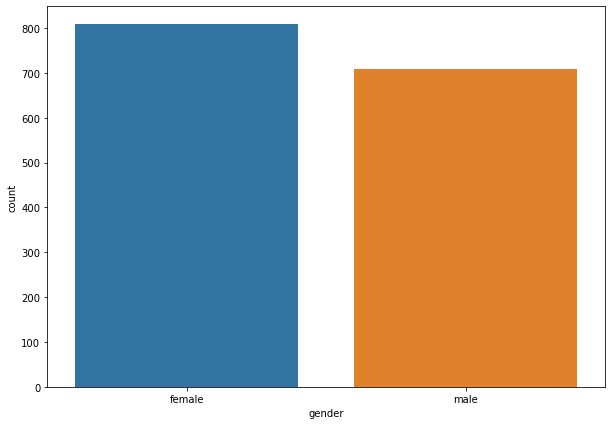

In [1475]:
plt.figure(figsize=(10,7))
sns.countplot(data=election, x='gender');

In [1476]:
election.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

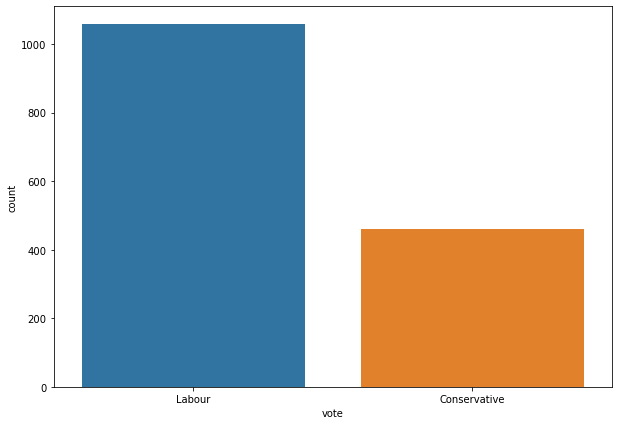

In [1477]:
plt.figure(figsize=(10,7))
sns.countplot(data=election, x='vote');

In [1478]:
election.groupby(['gender'])['vote'].value_counts()

gender  vote        
female  Labour          551
        Conservative    257
male    Labour          506
        Conservative    203
Name: vote, dtype: int64

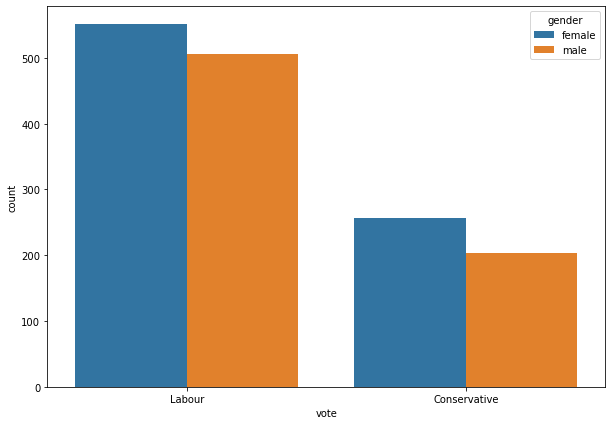

In [1479]:
plt.figure(figsize=(10,7))
sns.countplot(data=election, x='vote', hue='gender');

In [1480]:
print(election.groupby(['Hague'])['vote'].value_counts())
print(election.groupby(['Blair'])['vote'].value_counts())

Hague  vote        
1      Labour          222
       Conservative     11
2      Labour          522
       Conservative     95
3      Labour           28
       Conservative      9
4      Conservative    286
       Labour          271
5      Conservative     59
       Labour           14
Name: vote, dtype: int64
Blair  vote        
1      Conservative     59
       Labour           38
2      Conservative    240
       Labour          194
3      Conservative      1
4      Labour          676
       Conservative    157
5      Labour          149
       Conservative      3
Name: vote, dtype: int64


C:\Users\balar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

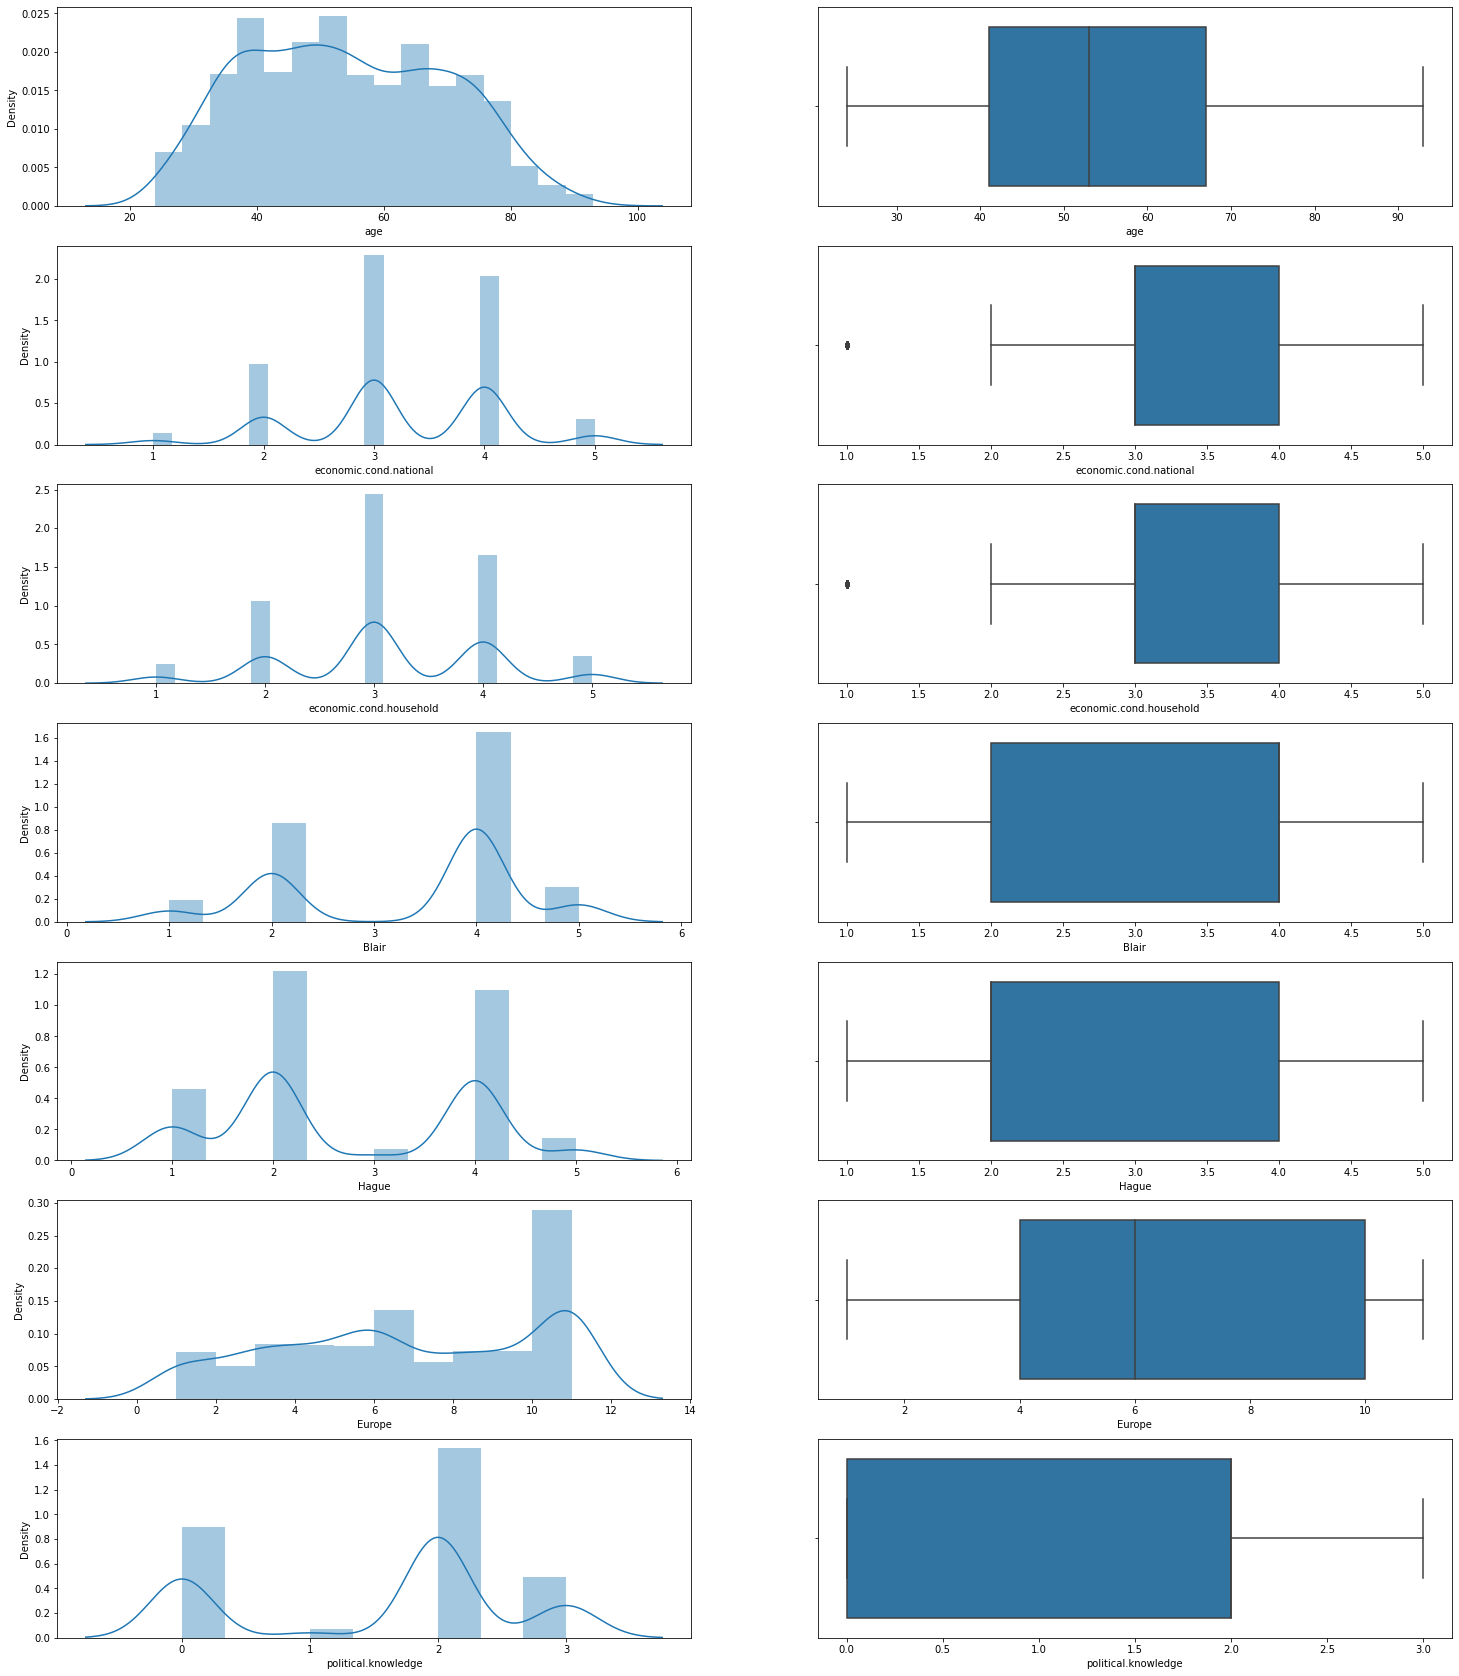

In [1481]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25,30)
sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['Blair'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Blair', data=election , ax=axes[3][1])
sns.distplot(election['Hague'], kde=True, ax=axes[4][0])
sns.boxplot(x='Hague', data=election, ax=axes[4][1])
sns.distplot(election['Europe'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Europe', data=election , ax=axes[5][1])
sns.distplot(election['political.knowledge'] , kde=True, ax=axes[6][0])
sns.boxplot(x='political.knowledge', data=election , ax=axes[6][1])

plt.show()

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\balar\anacond

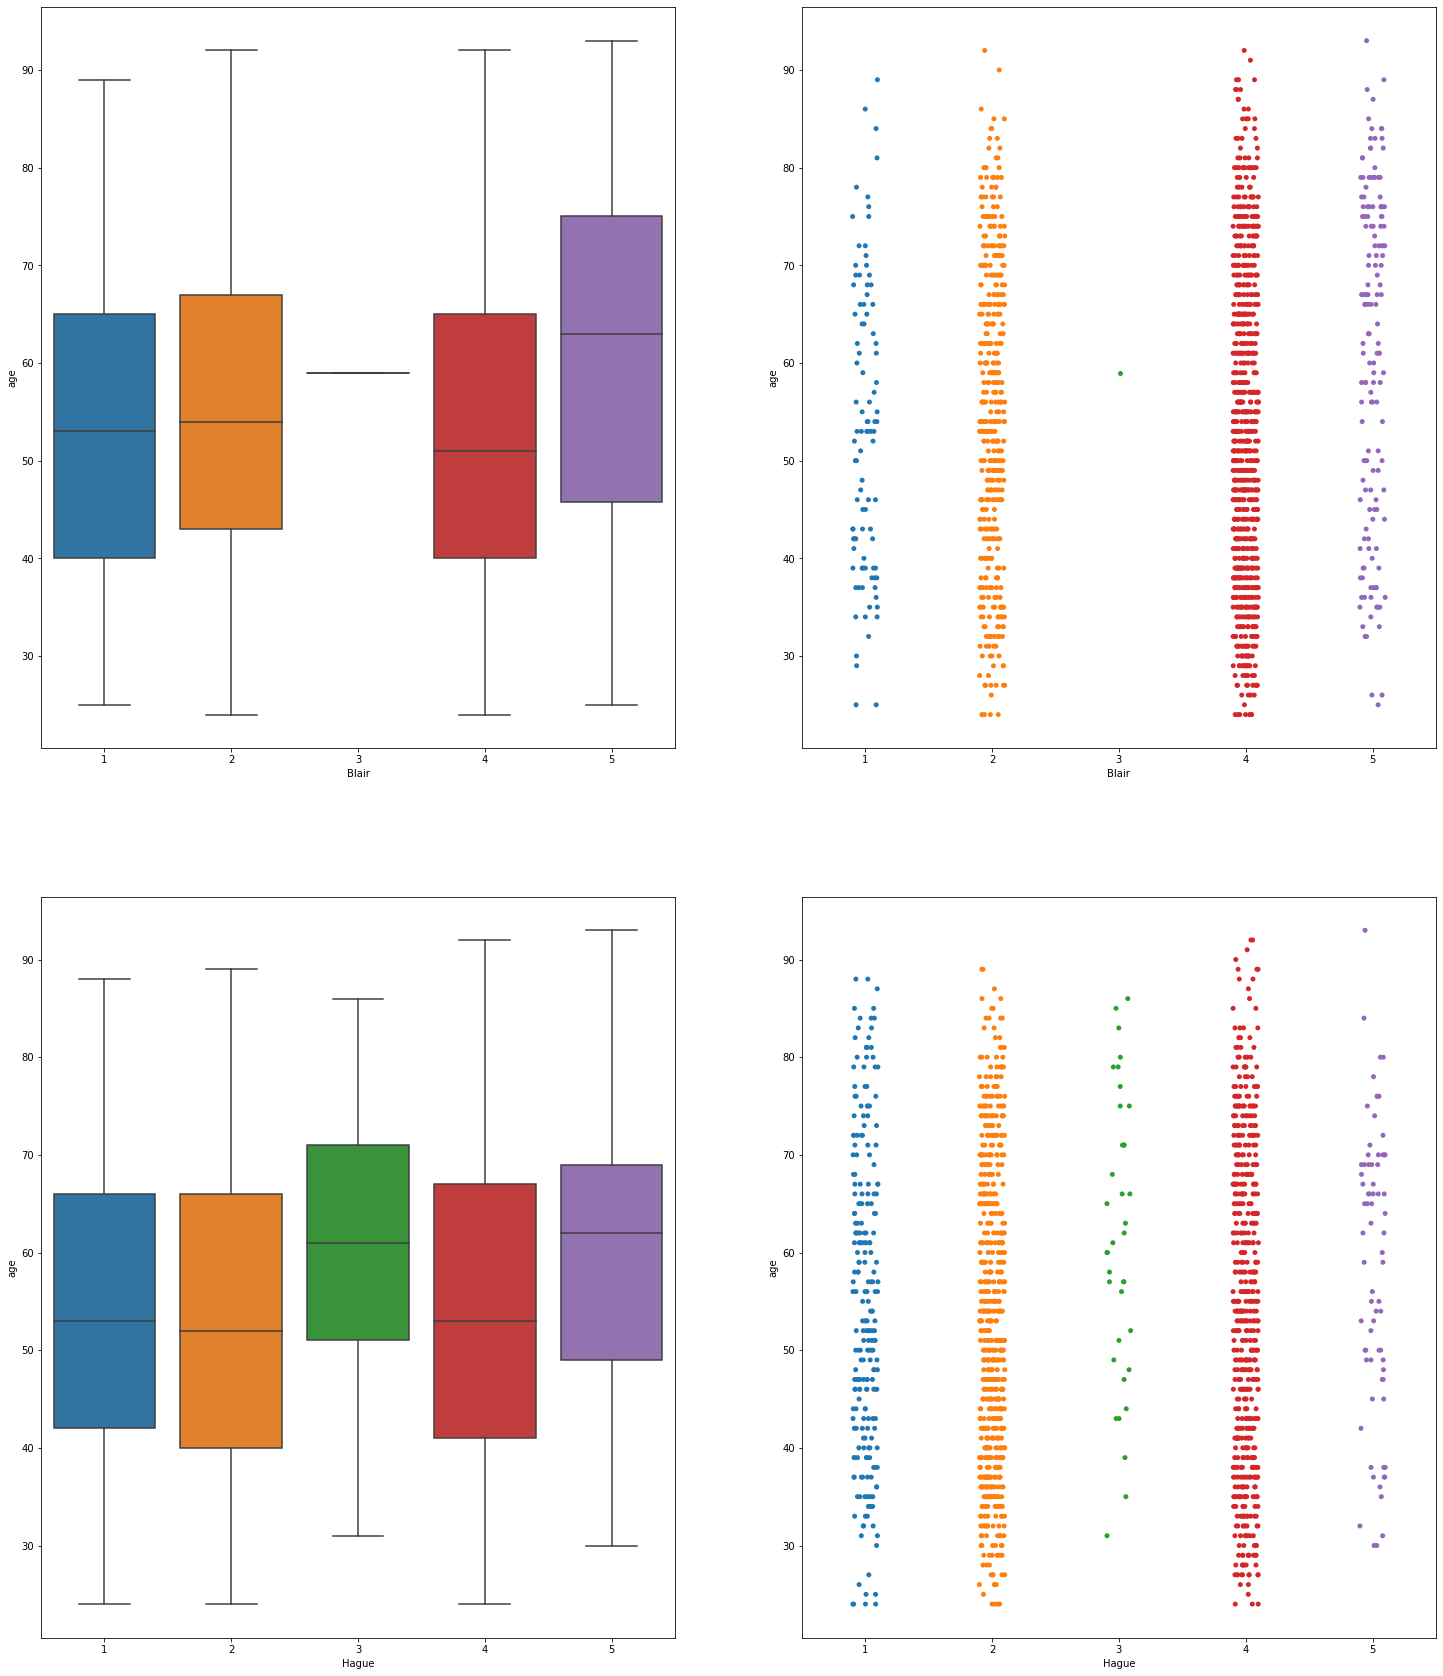

In [1482]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,30)
sns.boxplot(election["Blair"],election["age"], ax = axes[0][0])
sns.stripplot(election["Blair"],election["age"], ax = axes[0][1])
sns.boxplot(election["Hague"],election["age"], ax = axes[1][0])
sns.stripplot(election["Hague"],election["age"], ax = axes[1][1])
plt.show()

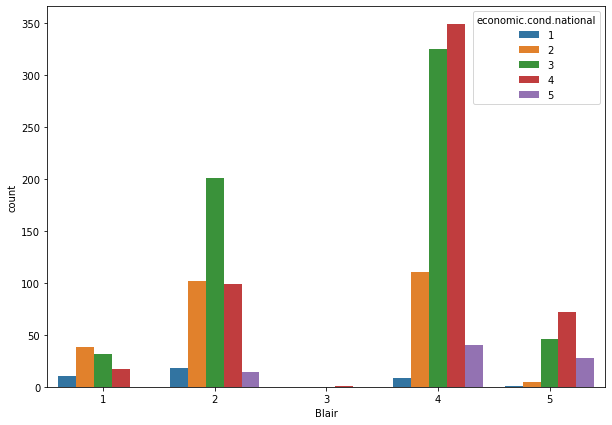

In [1483]:
plt.figure(figsize=(10,7))
sns.countplot(x='Blair', hue='economic.cond.national', data=election);

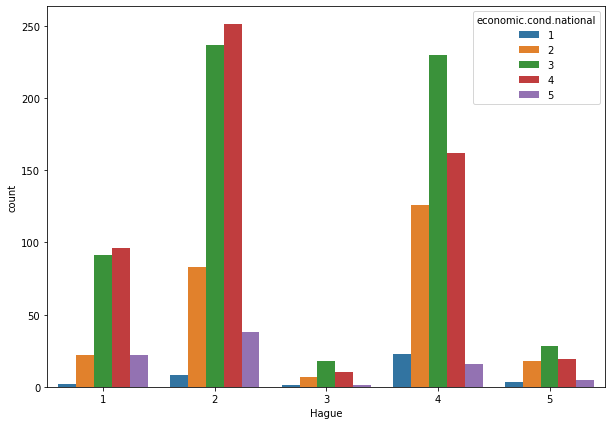

In [1484]:
plt.figure(figsize=(10,7))
sns.countplot(x='Hague', hue='economic.cond.national', data=election);

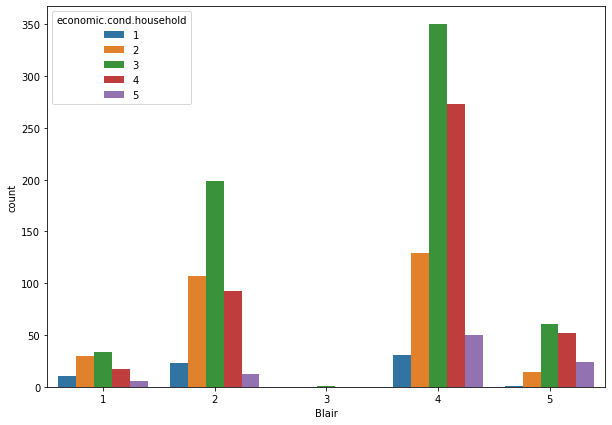

In [1485]:
plt.figure(figsize=(10,7))
sns.countplot(x='Blair', hue='economic.cond.household', data=election);

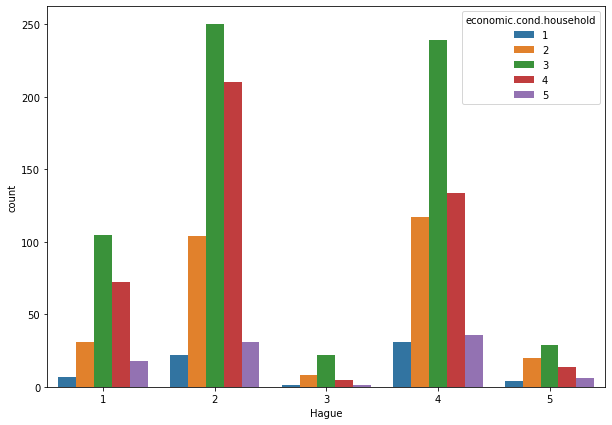

In [1486]:
plt.figure(figsize=(10,7))
sns.countplot(x='Hague', hue='economic.cond.household', data=election);

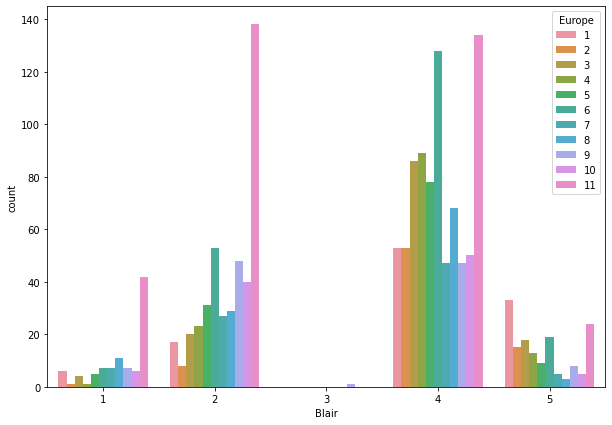

In [1487]:
plt.figure(figsize=(10,7))
sns.countplot(x='Blair', hue='Europe', data=election);

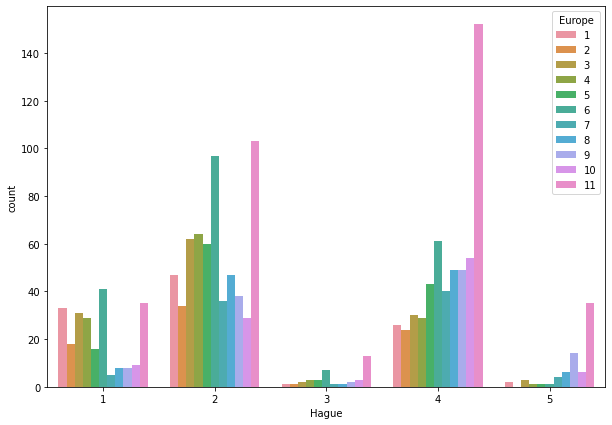

In [1488]:
plt.figure(figsize=(10,7))
sns.countplot(x='Hague', hue='Europe', data=election);

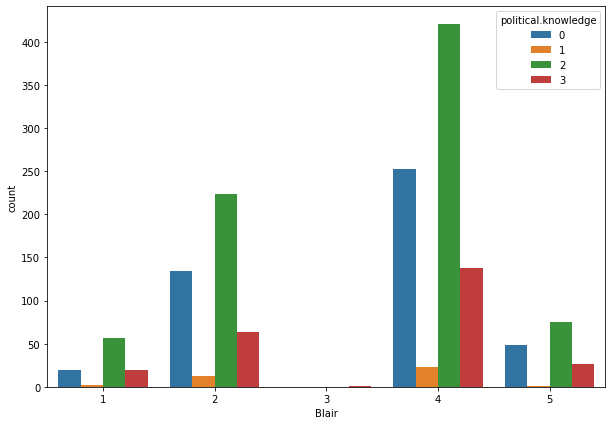

In [1489]:
plt.figure(figsize=(10,7))
sns.countplot(x='Blair', hue='political.knowledge', data=election);

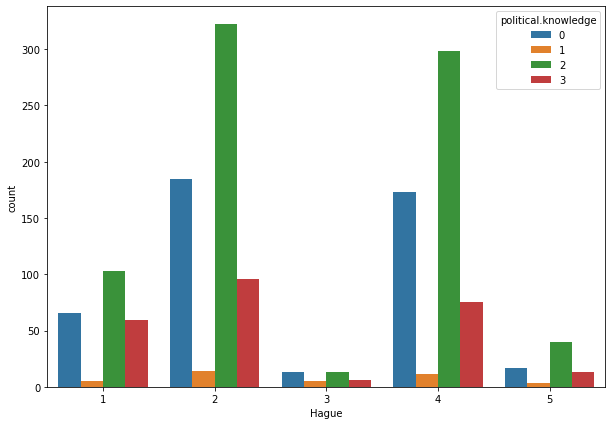

In [1490]:
plt.figure(figsize=(10,7))
sns.countplot(x='Hague', hue='political.knowledge', data=election);

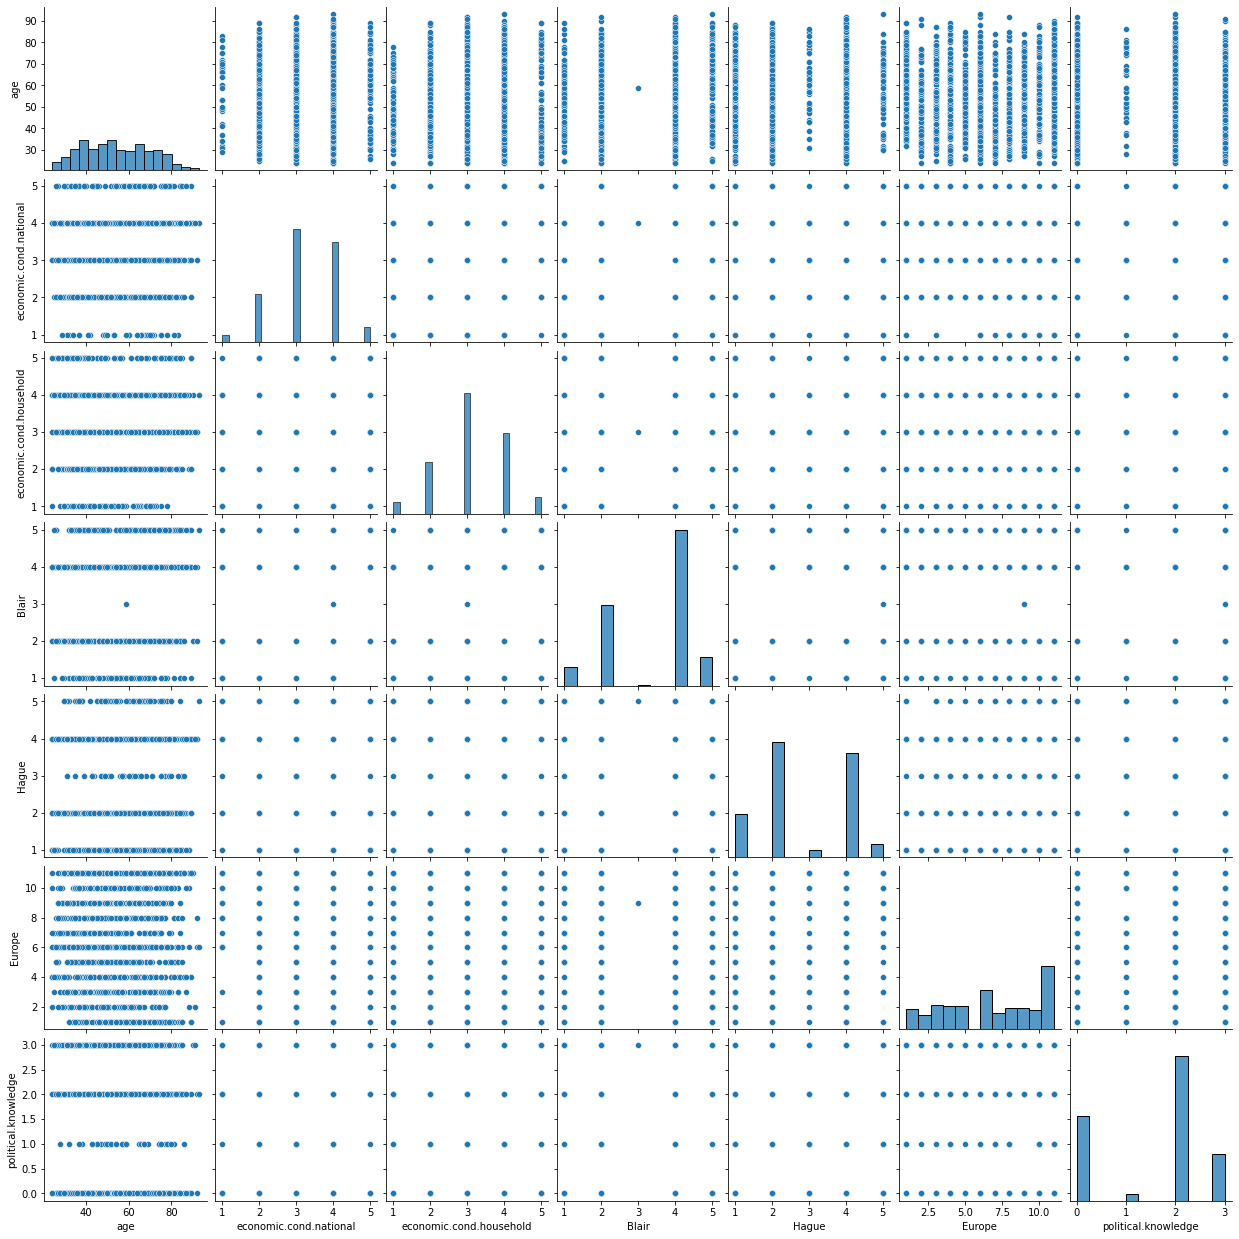

In [1491]:
sns.pairplot(election);

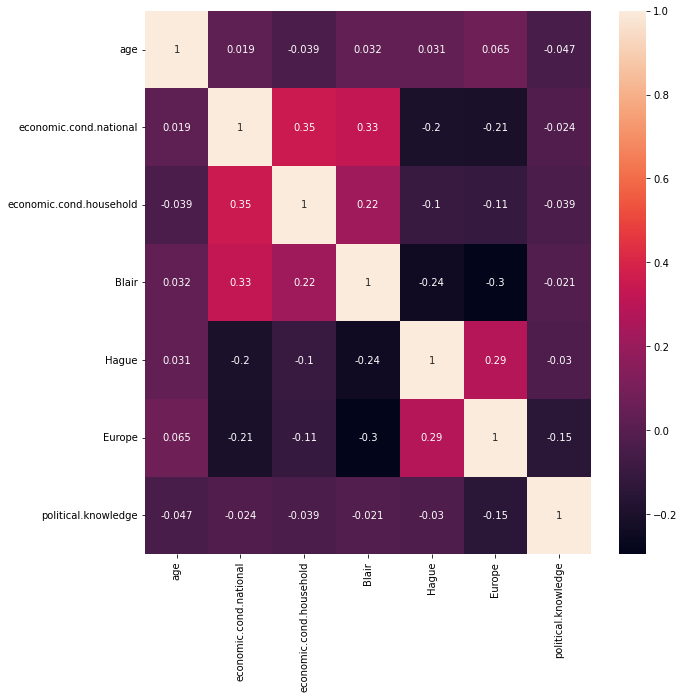

In [1492]:
plt.figure(figsize=(10,10))
sns.heatmap(election.corr(), annot=True);

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [1493]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 150.8+ KB


In [1494]:
#Coding our categorical variable
election['vote']=np.where(election['vote']=='Labour','1',election['vote'])
election['vote']=np.where(election['vote']=='Conservative','0',election['vote'])
election['gender']=np.where(election['gender']=='male','1',election['gender'])
election['gender']=np.where(election['gender']=='female','0',election['gender'])

In [1495]:
#Converting our categorical variable datatype
election['vote']=election['vote'].astype('int64')
election['gender']=election['gender'].astype('int64')

In [1496]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [1497]:
election = pd.get_dummies(election, columns=['gender'], drop_first=True)

In [1498]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
1,1,43,3,3,4,1,2,2,0
2,1,36,4,4,4,4,5,2,1
3,1,35,4,4,5,2,3,2,1
4,1,24,4,2,2,1,4,0,0
5,1,41,2,2,1,1,6,2,1


### Before proceeding to splitting the dataset , we need to identify the target and the independent variables of the dataset. Since we are building a model to predict which party a voter will vote, it is clear that our target variable is 'vote' and all other features are independent variables. On observing the target data it is visible that there is a data imbalance in it. lets build a model and decide whether to apply any sampling techniques like SMOTE.

In [1499]:
election.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [1500]:
X = election.drop('vote', axis=1)
y = election.pop('vote')

### Since there is a data imbalance in the target variable we cannot split the data 50:50. Therefore, we split the data as usual with 70:30 split of the data.  70% of the  'X-independent features' and 'y-target feature' data is used as train data to build the model and the remianing 30% of the  'X-independent features' and 'y-target feature' data will be used as test data to test our built model.  The same data split ratio will be used for scaled data and SMOTE data after observing the performance of the unscaled data model.

In [1501]:
#splitting data
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size = .30 ,random_state = 1)

In [1502]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 8)
X_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


In [1503]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
992,34,2,4,1,4,11,2,0
1275,40,4,3,4,4,6,0,1
650,61,4,3,4,4,7,2,0
678,47,3,3,4,2,11,0,1
539,44,5,3,4,2,8,0,1


In [1504]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
505,71,3,3,2,2,8,2,0
370,43,3,2,4,2,8,3,1
1076,89,5,5,5,2,1,2,1
1032,47,2,3,2,4,8,2,0
1330,33,5,4,4,4,8,0,1


In [1505]:
y_train.value_counts()

1    754
0    307
Name: vote, dtype: int64

In [1506]:
y_test.value_counts()

1    303
0    153
Name: vote, dtype: int64

### Scaling is done so that the distance between the datapoints in different columns are not high and all the data points becomes closer to each other with a relatively comparable range and std dev. This helps with good performance of the model, generally this scaling is neccessary for making use of the regression models like linear regression and logistic regression which are sensitive to unscaled data. The scaled data also helps in reducing the multi-collinearity. The KNN models which works on analysing the distance between datapoints is also greatly affected by an unscaled data. Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes give weights to the features accordingly. Performing features scaling in these type of algorithms may not have much effect.
### The features in our dataset like the economic.cond.national, economic.cond.household, Blair, Hague, Europe, political.knowledge are having very acceptable range(Max and min values) and std dev values in its datapoints. But the age feature is having minimum of 24 and maximum of 93 with a std dev of 15.71 which is higher than the other features of our dataset.  Therefore we proceed with scaling the dataset.

In [1507]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms = MinMaxScaler()
#Scale the training and test data
#X_train['age'] = sc.fit_transform(X_train['age'])
#X_test['age'] = sc.transform(X_test['age'])

X_train[['age']] = mms.fit_transform(X_train[['age']])
X_test[['age']] = mms.transform(X_test[['age']])

In [1508]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
992,0.144928,2,4,1,4,11,2,0
1275,0.231884,4,3,4,4,6,0,1
650,0.536232,4,3,4,4,7,2,0
678,0.333333,3,3,4,2,11,0,1
539,0.289855,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
718,0.405797,3,3,4,1,6,2,0
909,0.275362,3,4,2,2,9,2,0
1101,0.724638,4,3,5,4,11,0,0
237,0.101449,3,3,2,3,6,0,0


## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# LogisticRegression model

In [1509]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## The various important parameters of the logistic regression model are penalty, solver, max_iter, tol, etc. Initially for building our model let us assign the following parameters: solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2.

In [1510]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, tol=0.001)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.001, verbose=True)

## Predicting on Training and Test dataset

In [1511]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [1512]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593


## Model Evaluation

In [1513]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8312912346842601

## AUC and ROC for the training data

AUC: 0.890


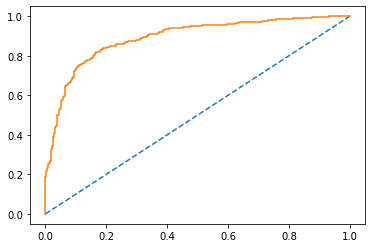

In [1514]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1515]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8355263157894737

## AUC and ROC for the test data

AUC: 0.890


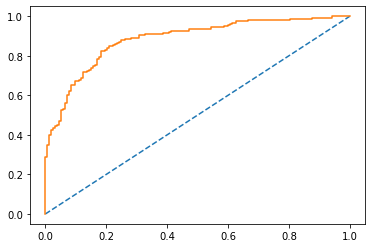

In [1516]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [1517]:
confusion_matrix(y_train, ytrain_predict)

array([[196, 111],
       [ 68, 686]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


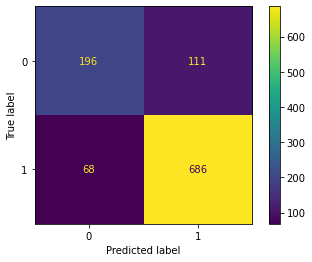

In [1518]:
plot_confusion_matrix(model,X_train,y_train);

In [1519]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



## Confusion Matrix for test data

In [1520]:
confusion_matrix(y_test, ytest_predict)

array([[113,  40],
       [ 35, 268]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


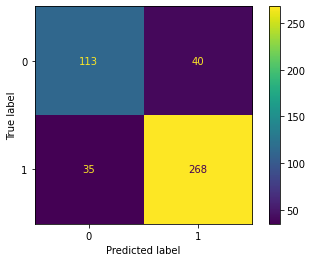

In [1521]:
plot_confusion_matrix(model,X_test,y_test);

In [1522]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



## Applying GridSearchCV for Logistic Regression

In [1523]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','saga'],
      'tol':[0.0001,0.00001]}

In [1524]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [1525]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [1526]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [1527]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'saga', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='saga')


In [1528]:
best_model = grid_search.best_estimator_

In [1529]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [1530]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424399,0.575601
1,0.148555,0.851445
2,0.007159,0.992841
3,0.836561,0.163439
4,0.068316,0.931684


In [1531]:
best_model.score(X_train, y_train)

0.8312912346842601

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


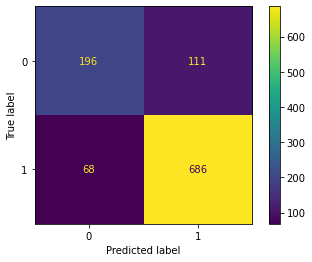

In [1532]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.890


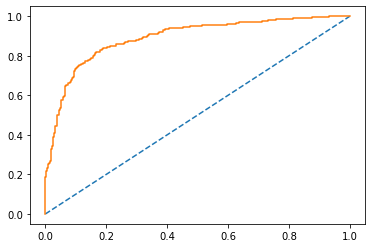

In [1533]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1534]:
best_model.score(X_test, y_test)

0.831140350877193

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


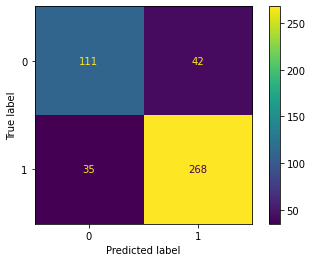

In [1535]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Linear Discriminant Analysis

In [1537]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

## The various important parameters of the LDA model are solver, shrinkage. We perform GridSearchCV later to find out the optimum parameter.

In [1538]:
#Build LDA Model , solver='lsqr',shrinkage='auto'
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

## Prediction

In [1539]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [1540]:

# Accuracy - Training Data
model.score(X_train, y_train)


0.8341187558906692

In [1541]:
# Accuracy - Test Data
model.score(X_test, y_test)


0.8333333333333334

## Training Data and Test Data Confusion Matrix Comparison

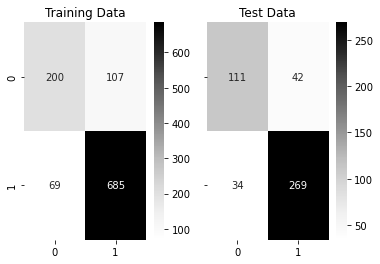

In [1542]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

## Training Data and Test Data Classification Report Comparison

In [1543]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



## Probability prediction for the training and test data

In [1544]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [1545]:
pred_prob_train[:,1]

array([0.05078353, 0.92175938, 0.69261127, ..., 0.77911156, 0.79161073,
       0.98113175])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


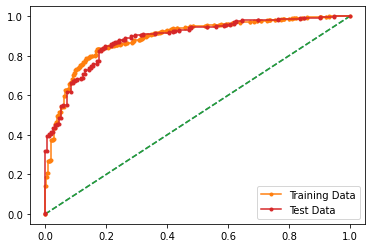

In [1546]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## changing the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.7587
F1 Score 0.8532 

Confusion Matrix


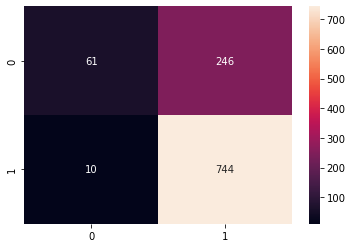

0.2 

Accuracy Score 0.7926
F1 Score 0.8689 

Confusion Matrix


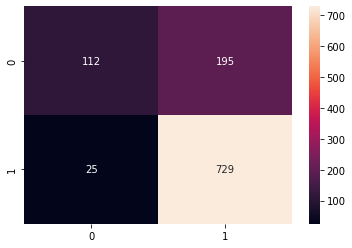

0.3 

Accuracy Score 0.8134
F1 Score 0.8787 

Confusion Matrix


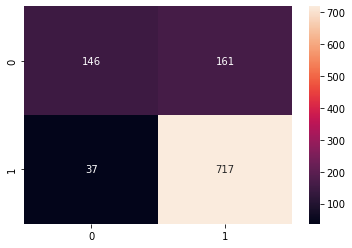

0.4 

Accuracy Score 0.8341
F1 Score 0.8897 

Confusion Matrix


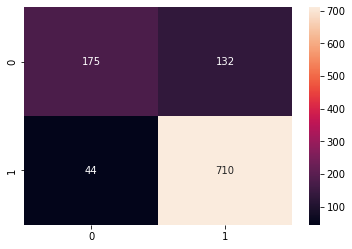

0.5 

Accuracy Score 0.8341
F1 Score 0.8862 

Confusion Matrix


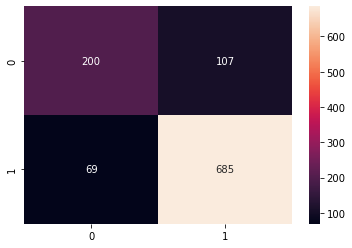

0.6 

Accuracy Score 0.8275
F1 Score 0.8781 

Confusion Matrix


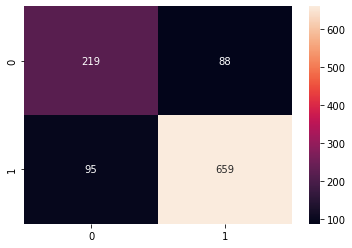

0.7 

Accuracy Score 0.8303
F1 Score 0.875 

Confusion Matrix


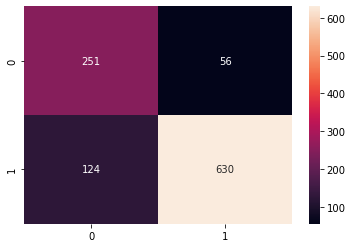

0.8 

Accuracy Score 0.7908
F1 Score 0.8363 

Confusion Matrix


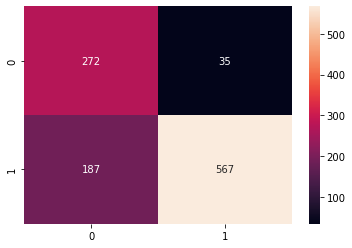

0.9 

Accuracy Score 0.6975
F1 Score 0.7384 

Confusion Matrix


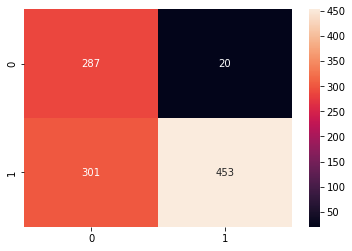

In [1547]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

## Predicting the classes on the test data

In [1548]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

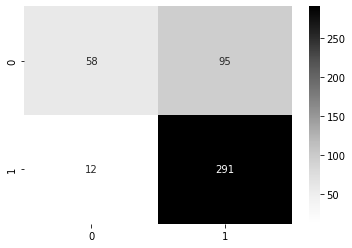

In [1549]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [1550]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.83      0.38      0.52       153
           1       0.75      0.96      0.84       303

    accuracy                           0.77       456
   macro avg       0.79      0.67      0.68       456
weighted avg       0.78      0.77      0.74       456
 



In [1551]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [1552]:
pred_prob_train[:,1]

array([0.05078353, 0.92175938, 0.69261127, ..., 0.77911156, 0.79161073,
       0.98113175])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


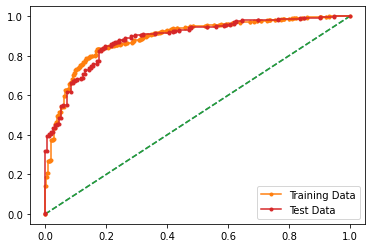

In [1553]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# KNN model

## The KNN model is a supervised ML model.  The various important parameters of the KNN model are  n_neighbors, weights, algorithm. We perform GridSearchCV later to find out the optimum parameter.

In [1554]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Performance Matrix on train data set

In [1555]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8510838831291234
[[220  87]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.927


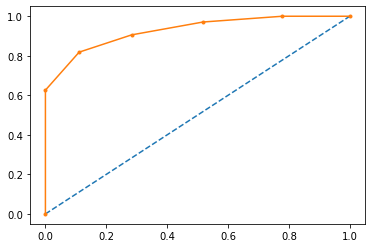

In [1556]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## Performance Matrix on test data set

In [1557]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[105  48]
 [ 38 265]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       153
           1       0.85      0.87      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.865


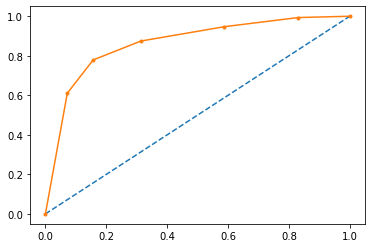

In [1558]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Default value n_neighbors=5, lets check the performance for K=7

In [1559]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Performance Matrix on train data set

In [1560]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[220  87]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



## Performance Matrix on test data set

In [1561]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8048245614035088
[[101  52]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       153
           1       0.84      0.88      0.86       303

    accuracy                           0.80       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.80      0.80      0.80       456



## As the difference between the test and train score is only 5% , we can conclude this model is performing well. But, lets try to find best n_neighbour by using MCE.

In [1562]:
# Finding the model with lowest MCE
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22807017543859653,
 0.19517543859649122,
 0.1885964912280702,
 0.19517543859649122,
 0.17543859649122806,
 0.17105263157894735,
 0.18201754385964908,
 0.16666666666666663,
 0.16447368421052633,
 0.17105263157894735]

Plot misclassification error vs k (with k value on X-axis) using matplotli

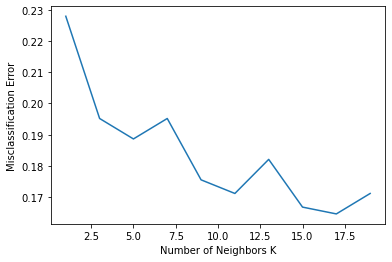

In [1563]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1564]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [1565]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8378887841658812
[[207 100]
 [ 72 682]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



AUC: 0.902


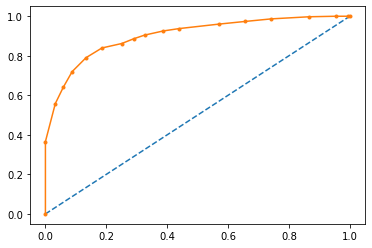

In [1566]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1567]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[110  43]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       153
           1       0.86      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.890


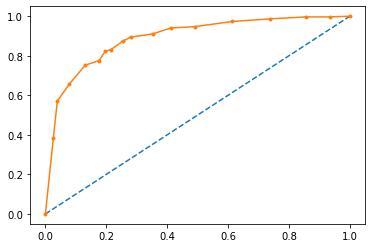

In [1568]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## The best n_neighbour by using MCE is found to be 17 as the difference between the test and train accuracy is only 1%. The model also performs better for this parameter.

# Gaussian Naive Bayes

In [1569]:
from sklearn.naive_bayes import GaussianNB

In [1570]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

## Performance Matrix on train data set

In [1571]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.888


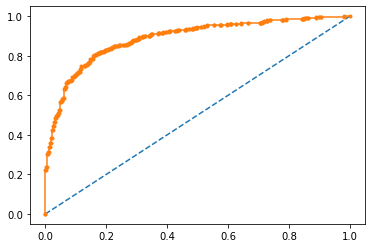

In [1572]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1573]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict)) 

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.876


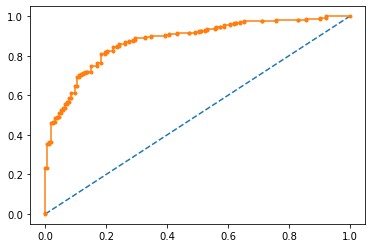

In [1574]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [1575]:
NB_model.score(X_train, y_train)

0.8350612629594723

In [1576]:
NB_model.score(X_test, y_test)

0.8223684210526315

## 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [1577]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ada boosting

In [1578]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [1579]:
ADB_model=AdaBoostClassifier()

In [1580]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [1581]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [1582]:
ADB_model=grid_search.best_estimator_
ADB_model

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [1583]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [1584]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8369462770970783
[[186 121]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.902


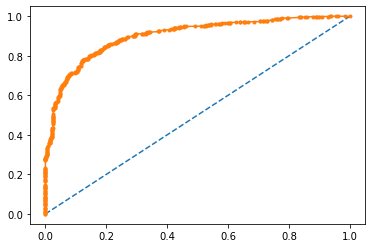

In [1585]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1586]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8092105263157895
[[ 98  55]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



AUC: 0.884


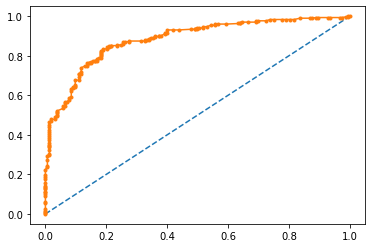

In [1587]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gradient

In [1588]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [1589]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AUC: 0.951


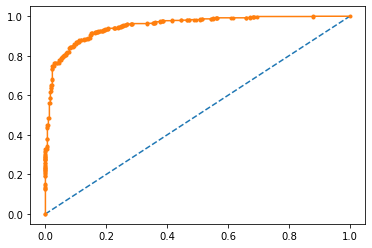

In [1590]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1591]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.899


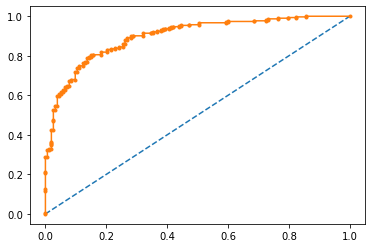

In [1592]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Decision Tree

In [1593]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [1594]:
DT_model= DecisionTreeClassifier()

In [1595]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [1596]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [1597]:
DT_model=grid_search.best_estimator_

In [1598]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [1599]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8397737983034873
[[234  73]
 [ 97 657]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       307
           1       0.90      0.87      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.907


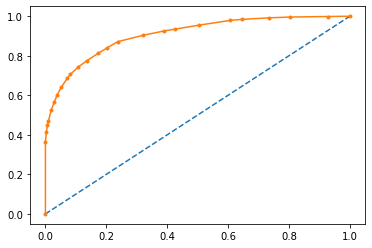

In [1600]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1601]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.7960526315789473
[[113  40]
 [ 53 250]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       153
           1       0.86      0.83      0.84       303

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



AUC: 0.856


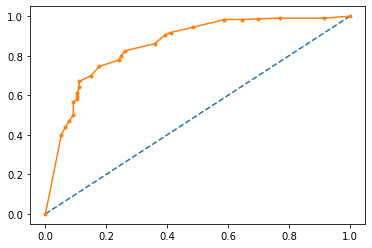

In [1602]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [1603]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [1604]:
RF_model=RandomForestClassifier()

In [1605]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [1606]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [1607]:
rfcl=grid_search.best_estimator_
rfcl

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [1608]:
RF_model=grid_search.best_estimator_
RF_model

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [1609]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [1610]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8576814326107446
[[202 105]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       307
           1       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AUC: 0.918


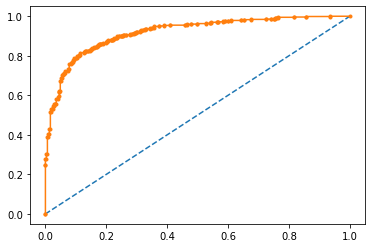

In [1611]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [1612]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8179824561403509
[[ 93  60]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       153
           1       0.82      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



AUC: 0.891


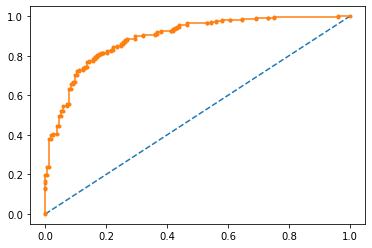

In [1613]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [1614]:
print (pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.057857
economic.cond.national   0.096586
economic.cond.household  0.036150
Blair                    0.225858
Hague                    0.283564
Europe                   0.230937
political.knowledge      0.059243
gender_1                 0.009804


# Bagging

In [1615]:
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=27)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        min_samples_leaf=15,
                                                        min_samples_split=30,
                                                        random_state=0),
                  n_estimators=100, random_state=27)

In [1616]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bagging = Bagging_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bagging = Bagging_model.predict(X_test)

In [1617]:
#Train Data Accuracy
BG_train_acc=Bagging_model.score(X_train,y_train) 
round(BG_train_acc,5)

0.84449

In [1618]:
#Test Data Accuracy
BG_test_acc=Bagging_model.score(X_test,y_test) 
round(BG_test_acc,5)

0.82237

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

## 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

# Problem 2:

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### 1.President Franklin D. Roosevelt in 1941
### 2.President John F. Kennedy in 1961
### 3.President Richard Nixon in 1973

In [1619]:
import re 
import nltk 
import string
import random
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

In [1620]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\balar\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [1621]:
all_speeches = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

for i in all_speeches:
    num_chars = len(inaugural.raw(i))
    num_words = len(inaugural.words(i))
    num_sents = len(inaugural.sents(i))
    print(pd.DataFrame({i:[num_chars,num_words,num_sents]},index=['The number of character in the speech','The number of words in the speech','The number of sentences in the speech']))

                                       1941-Roosevelt.txt
The number of character in the speech                7571
The number of words in the speech                    1536
The number of sentences in the speech                  68
                                       1961-Kennedy.txt
The number of character in the speech              7618
The number of words in the speech                  1546
The number of sentences in the speech                52
                                       1973-Nixon.txt
The number of character in the speech            9991
The number of words in the speech                2028
The number of sentences in the speech              69


## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [1622]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1623]:
special_characters=['--'] + list(string.punctuation)
remove_stopword = stopwords.words('english') + special_characters

words_speech1 = (w.lower() for w in inaugural.words(fileids='1941-Roosevelt.txt'))
words_speech2 = (w.lower() for w in inaugural.words(fileids='1961-Kennedy.txt'))
words_speech3 = (w.lower() for w in inaugural.words(fileids='1973-Nixon.txt'))

words_cleaned_speech1 = [word for word in words_speech1 if word not in remove_stopword]
words_cleaned_speech2 = [word for word in words_speech2 if word not in remove_stopword]
words_cleaned_speech3 = [word for word in words_speech3 if word not in remove_stopword]

In [1624]:
print('Word count after removing stopwords in Roosevelt speech is',len(words_cleaned_speech1),'words')
print('Word count after removing stopwords in Kennedy speech is',len(words_cleaned_speech2),'words')
print('Word count after removing stopwords in Nixon speech is',len(words_cleaned_speech3),'words')

Word count after removing stopwords in Roosevelt speech is 632 words
Word count after removing stopwords in Kennedy speech is 697 words
Word count after removing stopwords in Nixon speech is 836 words


In [1625]:
words_cleaned_speech1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [1626]:
words_cleaned_speech2

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [1627]:
words_cleaned_speech3

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [1628]:
# Most Frequent words in 1941-Roosevelt Speech
df1 = nltk.FreqDist(words_cleaned_speech1)
df1 = pd.DataFrame.from_dict(df1,orient='index')
df1 = df1.rename(columns={0:'Count'})
df1.sort_values(by=['Count'],ascending=False, inplace=True)
print("The top ten words occuring most number of times in 1941-Roosevelt Speech are")
df1.head(10)

The top ten words occuring most number of times in 1941-Roosevelt Speech are


,Count
nation,12
know,10
spirit,9
democracy,9
life,9
us,8
america,7
people,7
years,6
freedom,6


In [1629]:
# Most Frequent words in 1961-Kennedy Speech
df2 = nltk.FreqDist(words_cleaned_speech2)
df2 = pd.DataFrame.from_dict(df2,orient='index')
df2 = df2.rename(columns={0:'Count'})
df2.sort_values(by=['Count'],ascending=False, inplace=True)
print("The top ten words occuring most number of times in 1961-Kennedy Speech are")
df2.head(10)

The top ten words occuring most number of times in 1961-Kennedy Speech are


,Count
let,16
us,12
sides,8
world,8
new,7
pledge,7
shall,5
power,5
nations,5
ask,5


In [1630]:
# Most Frequent words in 1973-Nixon Speech
df3 = nltk.FreqDist(words_cleaned_speech3)
df3 = pd.DataFrame.from_dict(df3,orient='index')
df3 = df3.rename(columns={0:'Count'})
df3.sort_values(by=['Count'],ascending=False, inplace=True)
print("The top ten words occuring most number of times in 1973-Nixon Speech")
df3.head(10)

The top ten words occuring most number of times in 1973-Nixon Speech


,Count
us,26
let,22
america,21
peace,19
world,18
new,15
responsibility,11
nation,11
government,10
home,9


## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [1631]:
wc_a = ' '.join(words_cleaned_speech1)
wc_b = ' '.join(words_cleaned_speech2)
wc_c = ' '.join(words_cleaned_speech3)

The word cloud for the 1941-Roosevelt Speech (after removing the stopwords)!!


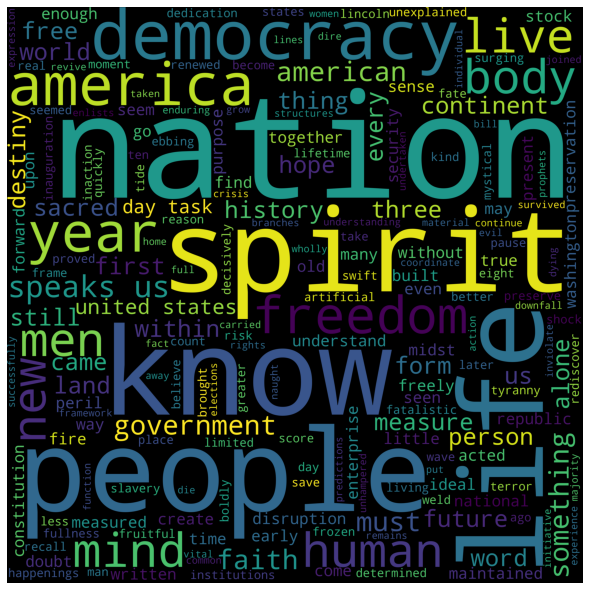

In [1632]:
# Word Cloud for 1941-Roosevelt Speech

from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("The word cloud for the 1941-Roosevelt Speech (after removing the stopwords)!!")
plt.show()

The word cloud for the 1961-Kennedy Speech (after removing the stopwords)!!


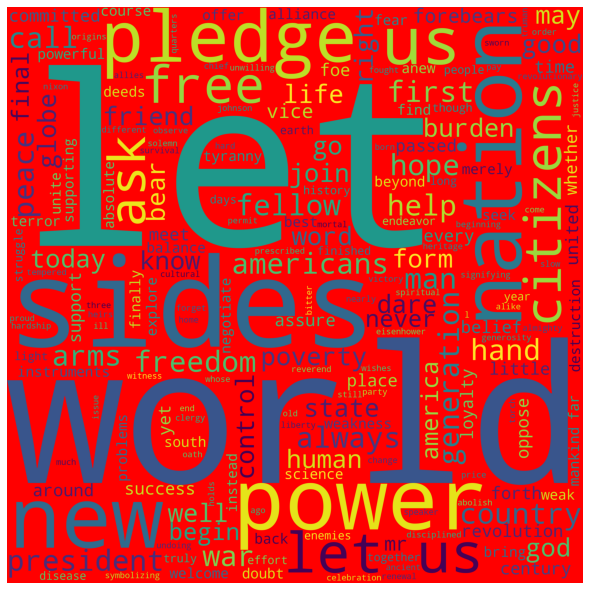

In [1633]:
# Word Cloud for 1961-Kennedy Speech
wordcloud = WordCloud(stopwords=STOPWORDS,width = 3000, height = 3000, 
                background_color ='red', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("The word cloud for the 1961-Kennedy Speech (after removing the stopwords)!!")
plt.show()

The word cloud for the 1973-Nixon Speech (after removing the stopwords)!!


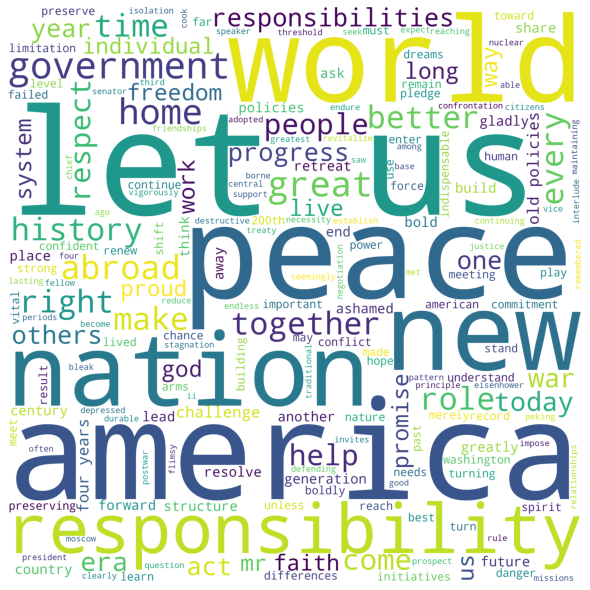

In [1634]:
# Word Cloud for 1973-Nixon Speech
wordcloud = WordCloud(stopwords=STOPWORDS,width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("The word cloud for the 1973-Nixon Speech (after removing the stopwords)!!")
plt.show()